In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("./dataset/ecommerce_transaction_data.csv")

#### 1. Data Cleaning and Preparation

In [2]:
# Handled Null Values e.g. Rating 
data['Rating'] = data['Rating'].fillna(data['Rating'].mean()).round(2)

In [3]:
# Convert Data Types where required 
data['Order Date'] = data['Order Date'].astype('datetime64[ns]')

In [4]:
# Added Total Amount Column 
data['Total Amount'] = data['Quantity'] * data['Price per Unit']

#### 2. Exploratory Data Analysis (EDA)

In [5]:
# Total Revenue 
total_revenue = data['Total Amount'].sum().round()
print("Total Revenue: ", total_revenue)

Total Revenue:  8265597.0


In [6]:
# Avg Basket Size 
number_of_products_per_order = data['Quantity'].mean().round()
print("Average Basket Size: ", number_of_products_per_order)

Average Basket Size:  3.0


In [7]:
# Avg Order Value 
average_order_value = data['Total Amount'].mean().round()
print("Average Order Value: ", average_order_value)


Average Order Value:  8266.0


In [8]:
# Top 5 Categories by quantity sold 
top_5_categories_by_quantity = data.groupby("Product Category").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).rename(columns={"Quantity": "No. of items sold"}).head()
top_5_categories_by_quantity

,No. of items sold
Product Category,
Sports,464
Toys,434
Books,430
Home,429
Electronics,410


In [9]:
# Top 5 Categories by revenue 
top_5_categories_by_revenue = data.groupby("Product Category").agg({"Total Amount": "sum"}).sort_values(by="Total Amount", ascending=False).rename(columns={"Total Amount": "Total Revenue"}).astype(int).head()
top_5_categories_by_revenue

,Total Revenue
Product Category,
Sports,1259251
Books,1238558
Toys,1212869
Home,1204257
Fashion,1186568


In [10]:
# Which Age Group Buy the most 
order_per_age_group = data.groupby("Age").agg({"Customer ID": "count"}).sort_values(by="Customer ID", ascending=False)
order_per_age_group

,Customer ID
Age,
21,37
51,32
20,30
42,29
27,29
36,28
59,28
23,27
39,27


In [11]:
# Gender Group Buy the most 
order_per_gender_group = data.groupby("Gender").agg({"Customer ID": "count"}).sort_values(by="Customer ID", ascending=False)
order_per_gender_group

,Customer ID
Gender,
Other,339
Female,337
Male,324


In [12]:
# Cities with highest sales 
cities_highest_sales = data['City'].value_counts().sort_values(ascending=False)
cities_highest_sales

City
Karachi       164
Lahore        164
Rawalpindi    144
Multan        140
Quetta        136
Islamabad     131
Peshawar      121
Name: count, dtype: int64

In [13]:
most_preferred_payment_method = data['Payment Method'].value_counts().sort_values(ascending=False)
print(most_preferred_payment_method)

Payment Method
Credit Card         212
Wallet              207
UPI                 206
Debit Card          188
Cash on Delivery    187
Name: count, dtype: int64


#### 3. Time Series Analysis

In [14]:
# Analyze sales trends across months
def months(mon):
    months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
    return months[mon]

monthly_trends = data.groupby(data['Order Date'].dt.month).agg({"Order ID": "count"})
monthly_trends = monthly_trends.reset_index().rename(columns={'Order Date': 'Month', "Order ID": "No. of Orders"})
monthly_trends['Month'] = monthly_trends["Month"].apply(months)
monthly_trends.style.hide(axis="index")

Month,No. of Orders
Jan,76
Feb,68
Mar,90
Apr,102
May,94
Jun,82
Jul,71
Aug,85
Sep,87
Oct,89


In [15]:
# Total Revenue per month 
monthly_revenue = data.groupby(data['Order Date'].dt.month).agg({"Total Amount": "sum"}).reset_index().rename(columns={"Order Date": "Month"})
monthly_revenue['Month'] = monthly_revenue['Month'].apply(months)
monthly_revenue['Total Amount'] = monthly_revenue['Total Amount'].astype(int)
monthly_revenue.style.hide(axis="index")

Month,Total Amount
Jan,512552
Feb,533614
Mar,679325
Apr,838863
May,735460
Jun,788878
Jul,543134
Aug,696748
Sep,708837
Oct,799369


In [16]:
# Analyze sales trends across quarters
quarters_trends = data.groupby(data['Order Date'].dt.quarter).agg({"Order ID": "count"}).reset_index().rename(columns={"Order Date": "Quarter", "Order ID": "No. of Orders"})
quarters_trends.style.hide(axis=0)

Quarter,No. of Orders
1,234
2,278
3,243
4,245


In [17]:
# Identify peak sales months
peak_sales_months = monthly_trends.sort_values('No. of Orders', ascending=False).head(3)
peak_sales_months.style.hide(axis=0)

Month,No. of Orders
Apr,102
May,94
Nov,92


In [18]:
# low-performing periods
low_performing_periods = monthly_trends.sort_values('No. of Orders', ascending=True).head(3)
low_performing_periods.style.hide(axis=0)

Month,No. of Orders
Dec,64
Feb,68
Jul,71


#### 4. Customer Segmentation (Basic Level):

In [19]:
# Classify customers into groups based on total spending (e.g., High, Medium, Low).
customer_spendings = data.groupby("Customer ID")['Total Amount'].sum()
customer_segments = pd.cut(customer_spendings, bins=[0, 10000, 30000, float(np.inf)], labels=["Low", "Medium", "High"])

segmented_spendings = pd.DataFrame({
    "Total Amount": customer_spendings,
    "Segments": customer_segments
})

segmented_spendings

,Total Amount,Segments
Customer ID,,
C1,53800.54,High
C10,40945.76,High
C100,41854.41,High
C101,15282.91,Medium
C102,4040.52,Low
...,...,...
C95,3554.53,Low
C96,12332.82,Medium
C97,6791.10,Low


In [20]:
# Count Repeat vs One-Time Customers
customer_order_count = data["Customer ID"].value_counts()

one_time_customer = customer_order_count[customer_order_count == 1].count()
repeat_customer = customer_order_count[customer_order_count > 1].count()

print("One-Time Customers: ", one_time_customer)
print("Repeated Customers: ", repeat_customer)

One-Time Customers:  41
Repeated Customers:  248


In [21]:
# Create a DataFrame with customer order counts
customer_type = pd.DataFrame({
    "Customer ID": customer_order_count.index,
    "Order Count": customer_order_count.values
})

# Label customers
customer_type["Buyer Type"] = customer_type["Order Count"].apply(lambda x: "Repeat" if x > 1 else "One-Time")

# Merge back with original dataset
data_with_type = data.merge(customer_type[["Customer ID", "Buyer Type"]], on="Customer ID")

# Average rating per type
avg_rating_by_type = data_with_type.groupby("Buyer Type")["Rating"].mean().round(2)
print(avg_rating_by_type)


Buyer Type
One-Time    2.91
Repeat      3.03
Name: Rating, dtype: float64


#### 5. Product Rating Analysis

In [22]:
# Find average product rating per category.
avg_product_rating = data.groupby("Product Category").agg({"Rating": "mean"}).round(2)
avg_product_rating

,Rating
Product Category,
Beauty,2.96
Books,3.04
Electronics,3.09
Fashion,3.07
Home,3.08
Sports,3.00
Toys,2.96


In [23]:
# Correlation between Price and Rating 
cor = data['Price per Unit'].corr(data['Rating']).round(2)
print("Correlation b/w Price & Rating: ", cor)

Correlation b/w Price & Rating:  -0.04


In [24]:
# Identify top 5 highest-rated products with at least 50 purchases.
high_rated_products = data.groupby("Product ID").agg({"Rating": "mean", "Quantity": "sum"}).sort_values("Rating", ascending=False).round(2)
high_rated_products = high_rated_products[high_rated_products['Quantity']>=50]
high_rated_products

,Rating,Quantity
Product ID,,
P151,3.42,56
P144,3.29,54
P112,2.86,52
P140,2.72,56
P149,2.49,54


#### Data Visualization

1. Monthly Sales Trend Line Plot

<Figure size 1000x600 with 0 Axes>

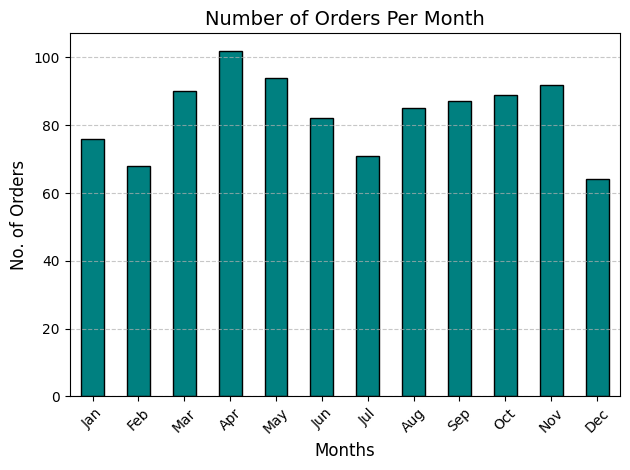

In [25]:
plt.figure(figsize=(10, 6))
monthly_plot = monthly_trends.plot(x='Month', y='No. of Orders', kind='bar', legend=False, color='teal', edgecolor='black')

plt.title("Number of Orders Per Month", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("No. of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Average Customer Ratings by Buyer Type

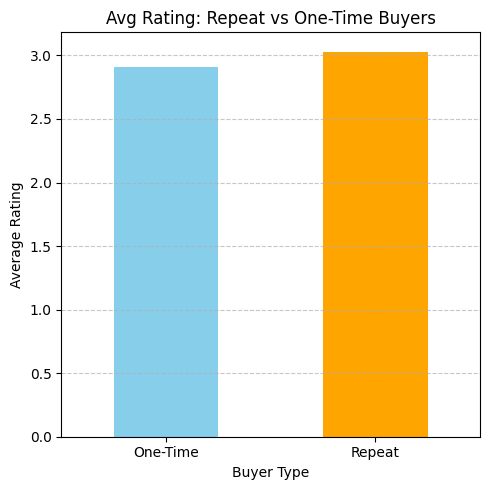

In [26]:
plt.figure(figsize=((5, 5)))
avg_rating_by_type.plot(kind="bar", title="Avg Rating: Repeat vs One-Time Buyers", 
                        ylabel="Average Rating", xlabel="Buyer Type", color=["skyblue", "orange"])
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Top 10 Products Sold

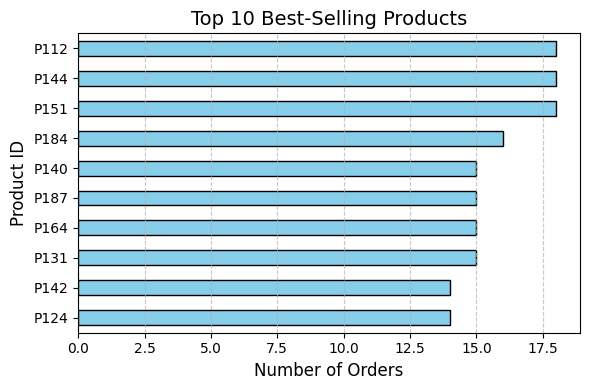

In [27]:
sales_per_product = data['Product ID'].value_counts().sort_values(ascending=True).tail(10)

plt.figure(figsize=(6, 4))
sales_per_product.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Product ID", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


4. Payment Method Distribution

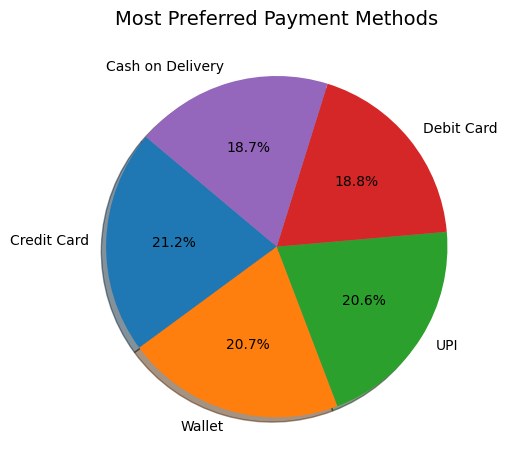

In [28]:
# plt.figure(figsize=(8, 6))
most_preferred_payment_method.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Most Preferred Payment Methods", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

5. Monthly Revenue Trend

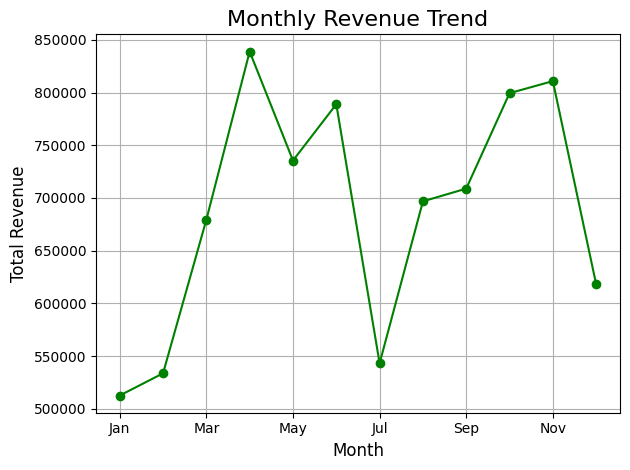

In [29]:
monthly_revenue.plot(x="Month", kind='line', marker='o', color='green', legend=False)
plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


6. Top 10 cities by number of orders

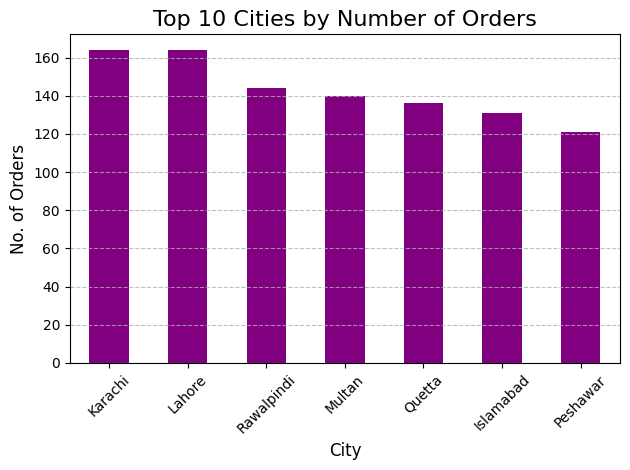

In [30]:
cities_highest_sales.plot(kind='bar', color='purple')
plt.title("Top 10 Cities by Number of Orders", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("No. of Orders", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7. Number of Repeat Vs One-Time Buyers

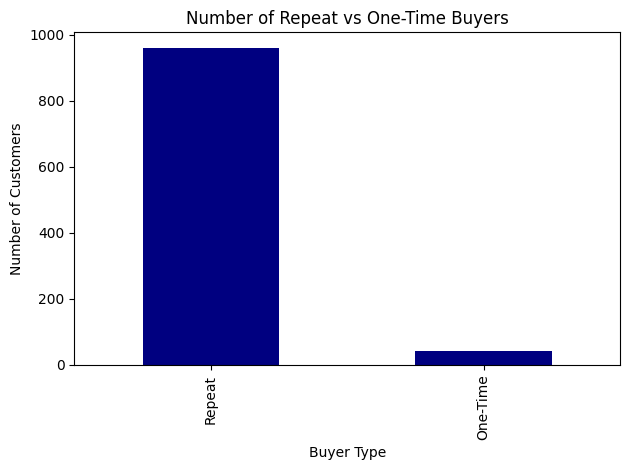

In [31]:
buyer_type_counts = data_with_type['Buyer Type'].value_counts()

buyer_type_counts.plot(kind='bar', color='navy')
plt.title("Number of Repeat vs One-Time Buyers")
plt.xlabel("Buyer Type")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
